In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import datetime

import math
from sklearn.preprocessing import MinMaxScaler

from tqdm import tqdm
plt.style.use("fivethirtyeight")
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("Gandhinagar_Data.csv")
df1 = df[['Timestamp', 'Year', 'Month', 'Date', 'Hours', 'PM2.5 (ug/m3)']]
df1

,Timestamp,Year,Month,Date,Hours,PM2.5 (ug/m3)
0,20-06-2021 - 00:00,2021,6,20,0,46.60
1,20-06-2021 - 01:00,2021,6,20,1,38.88
2,20-06-2021 - 02:00,2021,6,20,2,34.90
3,20-06-2021 - 03:00,2021,6,20,3,28.98
4,20-06-2021 - 04:00,2021,6,20,4,44.17
...,...,...,...,...,...,...
6409,15-03-2022 - 17:00,2022,3,15,17,36.88
6410,15-03-2022 - 18:00,2022,3,15,18,38.80
6411,15-03-2022 - 19:00,2022,3,15,19,49.80
6412,15-03-2022 - 20:00,2022,3,15,20,63.60


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6414 entries, 0 to 6413
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Timestamp      6414 non-null   object 
 1   Year           6414 non-null   int64  
 2   Month          6414 non-null   int64  
 3   Date           6414 non-null   int64  
 4   Hours          6414 non-null   int64  
 5   PM2.5 (ug/m3)  6168 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 300.8+ KB


In [ ]:
df1["Timestamp"] = pd.to_datetime(df1["Timestamp"])
df1.head()

,Timestamp,Year,Month,Date,Hours,PM2.5 (ug/m3)
0,2021-06-20 00:00:00,2021,6,20,0,46.60
1,2021-06-20 01:00:00,2021,6,20,1,38.88
2,2021-06-20 02:00:00,2021,6,20,2,34.90
3,2021-06-20 03:00:00,2021,6,20,3,28.98
4,2021-06-20 04:00:00,2021,6,20,4,44.17


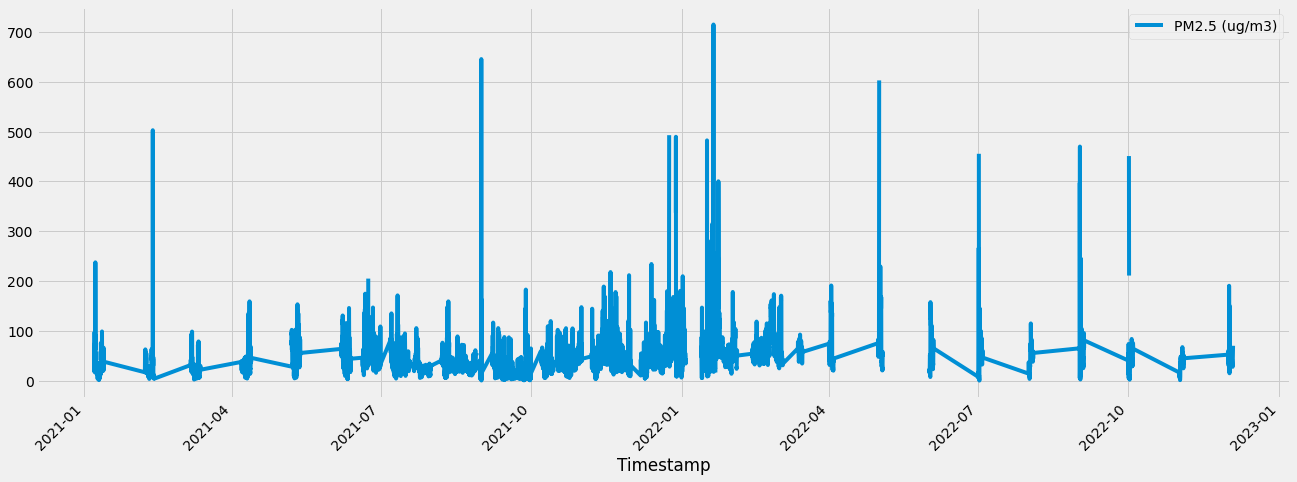

In [ ]:
import matplotlib.pyplot as plt

#df1['Date'] = df1["Timestamp"].dt.date
df1.plot(x='Timestamp',y='PM2.5 (ug/m3)',figsize=(20,8))
plt.xticks(rotation=45)

plt.show()

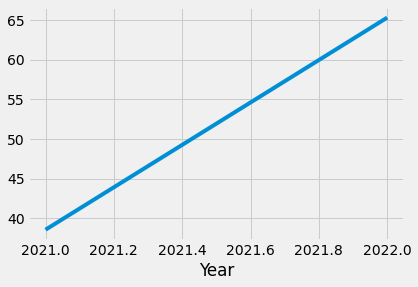

In [ ]:
df1.groupby('Year')['PM2.5 (ug/m3)'].mean().plot()

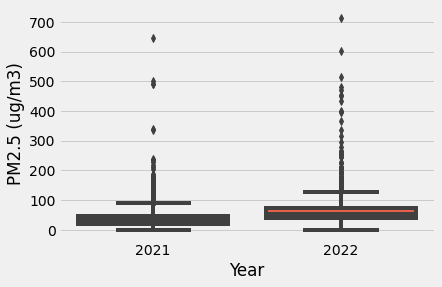

In [ ]:
import seaborn as sns
df1_year = df1.loc[:,['Year','PM2.5 (ug/m3)']]
sns.boxplot(x='Year', y='PM2.5 (ug/m3)',data = df1_year)

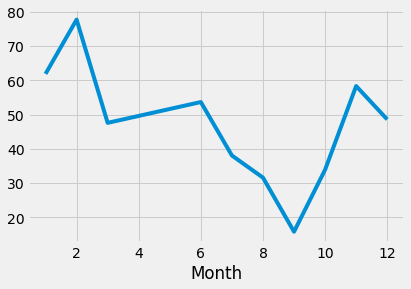

In [ ]:
df1.groupby('Month')['PM2.5 (ug/m3)'].mean().plot()

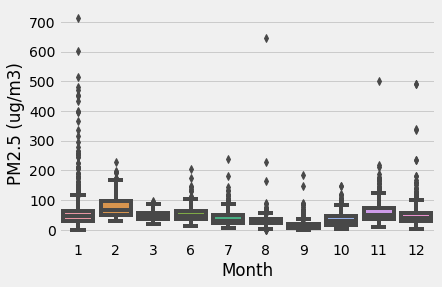

In [ ]:
df1_month = df1.loc[:,['Month','PM2.5 (ug/m3)']]
sns.boxplot(x='Month', y='PM2.5 (ug/m3)',data = df1_month)

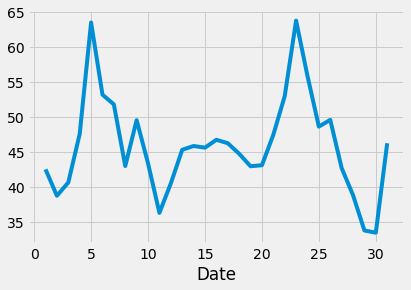

In [ ]:
df.groupby('Date')['PM2.5 (ug/m3)'].mean().plot()

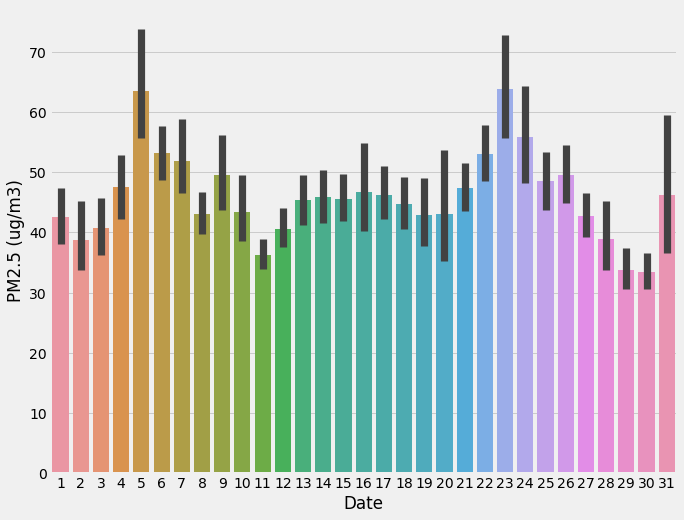

In [ ]:
df1_date = df1.loc[:,['Date','PM2.5 (ug/m3)']]
plt.figure(figsize=(10,8))
sns.barplot(x='Date', y='PM2.5 (ug/m3)', data = df1_date)

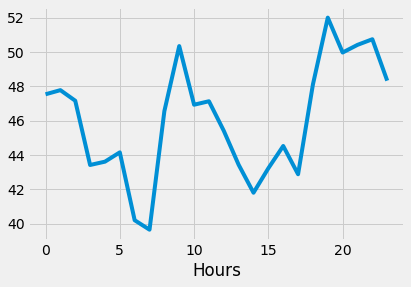

In [ ]:
df1.groupby('Hours')['PM2.5 (ug/m3)'].mean().plot()

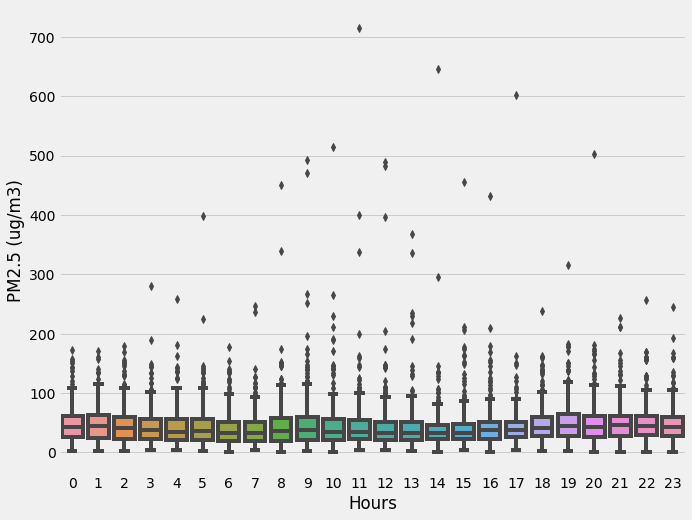

In [ ]:
df1_hour = df1.loc[:,['Hours','PM2.5 (ug/m3)']]
plt.figure(figsize=(10,8))
sns.boxplot(x='Hours', y='PM2.5 (ug/m3)',data = df1_hour)

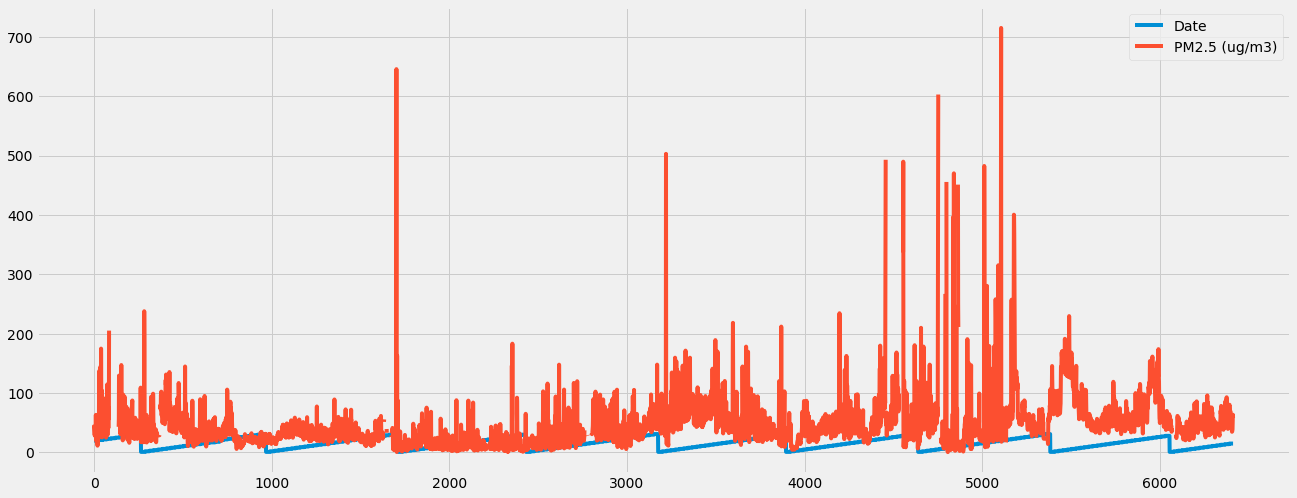

In [ ]:
df1_date.plot(figsize=(20,8))

In [ ]:
import math
dataset  = df1_date.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

5132

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

le = preprocessing.LabelEncoder()
df1['Timestamp'] = le.fit_transform(df1['Timestamp'])
df1['Date'] = le.fit_transform(df1['Date'])
sc = MinMaxScaler(feature_range=(0,1))
scaled_data = sc.fit_transform(df1)
scaled_data

array([[0.13493675, 0.        , 0.45454545, 0.63333333, 0.        ,
        0.06434223],
       [0.13509293, 0.        , 0.45454545, 0.63333333, 0.04347826,
        0.05353217],
       [0.1352491 , 0.        , 0.45454545, 0.63333333, 0.08695652,
        0.04795911],
       ...,
       [0.89848509, 1.        , 0.18181818, 0.46666667, 0.82608696,
        0.06882308],
       [0.89864126, 1.        , 0.18181818, 0.46666667, 0.86956522,
        0.08814675],
       [0.89879744, 1.        , 0.18181818, 0.46666667, 0.91304348,
        0.08044528]])

In [ ]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
num = 60
for i in range(num, len(train_data)):
    x_train.append(train_data[i-num:i , 0])
    y_train.append(train_data[i , 0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(5072, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer = "adam", loss = "mean_squared_error")

In [ ]:
model.fit(x_train,y_train, batch_size=1, epochs=1)

5072/5072 [==============================] - 143s 27ms/step - loss: 0.0016


In [ ]:
test_data = scaled_data[training_data_len-60: , :]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(num, len(test_data)):
      x_test.append(test_data[i-num:i, 0])

In [ ]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions
#predictions = sc.inverse_transform(predictions)

41/41 [==============================] - 2s 16ms/step


array([[0.76740193],
       [0.76755667],
       [0.7677113 ],
       ...,
       [0.89814085],
       [0.89829487],
       [0.8984488 ]], dtype=float32)

In [ ]:
train = df1_date[:training_data_len]
valid = df1_date[training_data_len:]
valid["Predictions"] = predictions
valid

,Date,PM2.5 (ug/m3),Predictions
5132,21,26.43,0.767402
5133,21,NaN,0.767557
5134,21,17.00,0.767711
5135,21,19.62,0.767866
5136,21,64.47,0.768021
...,...,...,...
6409,15,36.88,0.897833
6410,15,38.80,0.897987
6411,15,49.80,0.898141
6412,15,63.60,0.898295


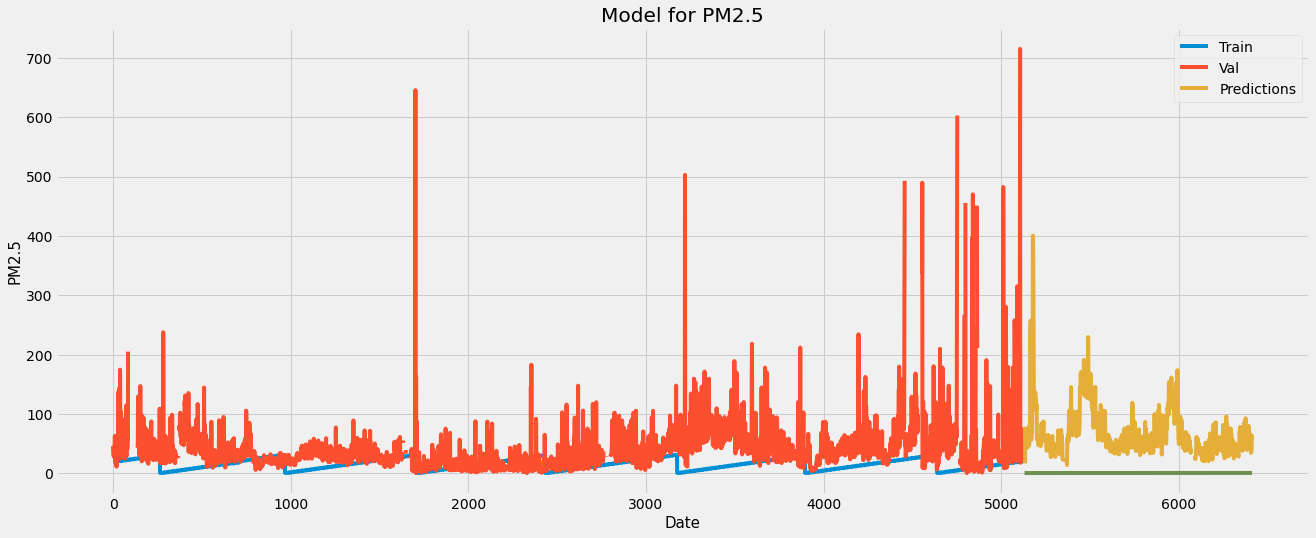

In [ ]:
plt.figure(figsize=(20,8))
plt.title("Model for PM2.5")
plt.xlabel("Date", fontsize = 15)
plt.ylabel("PM2.5",fontsize=15)
plt.plot(train[df1_date.columns])
plt.plot(valid['PM2.5 (ug/m3)'])
plt.plot(valid["Predictions"])
plt.legend(["Train","Val","Predictions"])